# Mouse Maze Simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gym
import gym_maze
import random
from IPython.display import Image
import pygame
import time
import seaborn as sns
sns.set()

pygame 2.0.0.dev1 (SDL 2.0.9, python 3.7.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class QlearningMouse:
    """
    The QlearningMouse object is a reinforcement learning 
    mouse agent that uses Q-learning to work its way through 
    an Open-ai maze to get to the end of the maze where the 
    reward (the hypothetical cheese) is. 
    
    This object has attributes such as state, decay factor, 
    discount rate, exploration rate and a Q-table. 
    It also has methods for stepping (deciding what the next 
    action is using the epsilon-greedy approach) and updating 
    the Q-table, as well as initializing a new episode. 
    
    This object uses a decaying epsilon and learning rate, 
    which improves its performance and makes it converge 
    faster. 
    """

    def __init__(self,
                 maze_width,
                 maze_height,
                 epsilon=0.9,
                 learning_rate=0.9,
                 decay_factor=10,
                 gamma=0.90):

        self.epsilon = epsilon
        self.state = (0., 0.)
        self.learning_rate = learning_rate
        self.decay_factor = decay_factor
        self.gamma = gamma
        self.episode = 0

        # initializing q-table
        self.q_table = {}
        for i in range(maze_width):
            for j in range(maze_height):
                self.q_table[(i, j)] = [0., 0., 0., 0.]

    def step(self):
        """
        Returns the next action, exploiting (1-epsilon)% of the time and
        exploring epsilon% of the time.
        """
        if random.random() < self.decayed_epsilon():
            return env.action_space.sample()
        else:
            action_idx = np.argmax(
                self.q_table[(self.state[0], self.state[1])])
            return int(action_idx)

    def decayed_epsilon(self):
        """
        Given the number of episodes, returns epsilon.
        Decayed epsilon is used because it makes the convergance much 
        faster. The epsilon is high at first, making the agent explore 
        more and it decreases as the number of episodes increase and the 
        agent exploits more.
        """
        # exploration rate is never smaller than 0.001 and never greater than 0.9
        return max(0.001, min(0.9, 1.0 - np.log10(self.episode/self.decay_factor)))

    def decayed_learning_rate(self):
        """
        Given the number of episodes, returns learning rate. 
        Similar to the decayed_epsilon() function, this function returns 
        the learning rate depending on the number of episodes. The learning 
        rate is high at first and it decreases as the number of episodes 
        increase, resulting in better learning performance. 
        """
        # learning rate is never smaller than 0.2 and never greater than 0.9
        return max(0.2, min(0.9, 1.0 - np.log10(self.episode/self.decay_factor)))

    def update(self, action, observation, reward):
        """
        Updates q-table based on an action, observation and reward. 
        """
        best_q = np.amax(
            self.q_table[(int(observation[0]), int(observation[1]))])

        q_table_key = (self.state[0], self.state[1])
        
        # updating Q-table using the Q-learning formula
        self.q_table[q_table_key][action] += \
            self.decayed_learning_rate() * (reward + self.gamma * (best_q) -
                                            self.q_table[q_table_key][action])

        self.state = [int(observation[0]), int(observation[1])]

    def init_new_episode(self, init_state):
        """
        Initiates a new episode for learning.
        """
        self.episode += 1
        self.state = [int(init_state[0]), int(init_state[1])]

In [3]:
maze_episodes = {}
def find_cheese(env, agent, episodes=2000, steps=10000, should_render=False):
    """
    Given a gym environment and an agent object, trains a mouse to find cheese.
    
    Should_render: should be set to 'True' if you want to view the the maze.
    The kernel should be reset after each time it runs.
    """
    env_height = env.observation_space.high[0] + 1
    env_width = env.observation_space.high[1] + 1
    
    try:
        start = time.time_ns()
        number_of_steps = []
        for i_episode in range(episodes):
            print(f"Starting episode {i_episode}")

            observation = env.reset()
            agent.init_new_episode(observation)
            for t in range(steps):
                
                if should_render:
                    env.render()
                    
                action = agent.step()
                observation, reward, done, info = env.step(action)
                agent.update(action, observation, reward)
                
                if done:
                    print(f"Episode finished after {t+1} timesteps")
                    number_of_steps.append(t+1)
                    break
            
            # if the number of steps hasn't changed for the past 10 episodes, the optimal solution has been found
            if len(number_of_steps) > 10 and len(set(number_of_steps[-10:])) == 1: 
                end = time.time_ns()
                
                maze_episodes[(env_height, env_width)] = {
                    "steps": number_of_steps,
                    "num_episodes": i_episode,
                    "execution_time_ms": (end - start) // 1_000_000
                }
                
                break
    finally:
        env.close()
        pygame.display.quit()
        pygame.quit()
        env.close()

In [4]:
mazes = [
    'maze-v0',
    'maze-random-3x3-v0',
    'maze-random-5x5-v0',
    'maze-sample-10x10-v0',
    'maze-random-10x10-v0',
    'maze-random-20x20-plus-v0',
    'maze-random-30x30-plus-v0'
]

### Results for 'maze-random-3x3-v0'

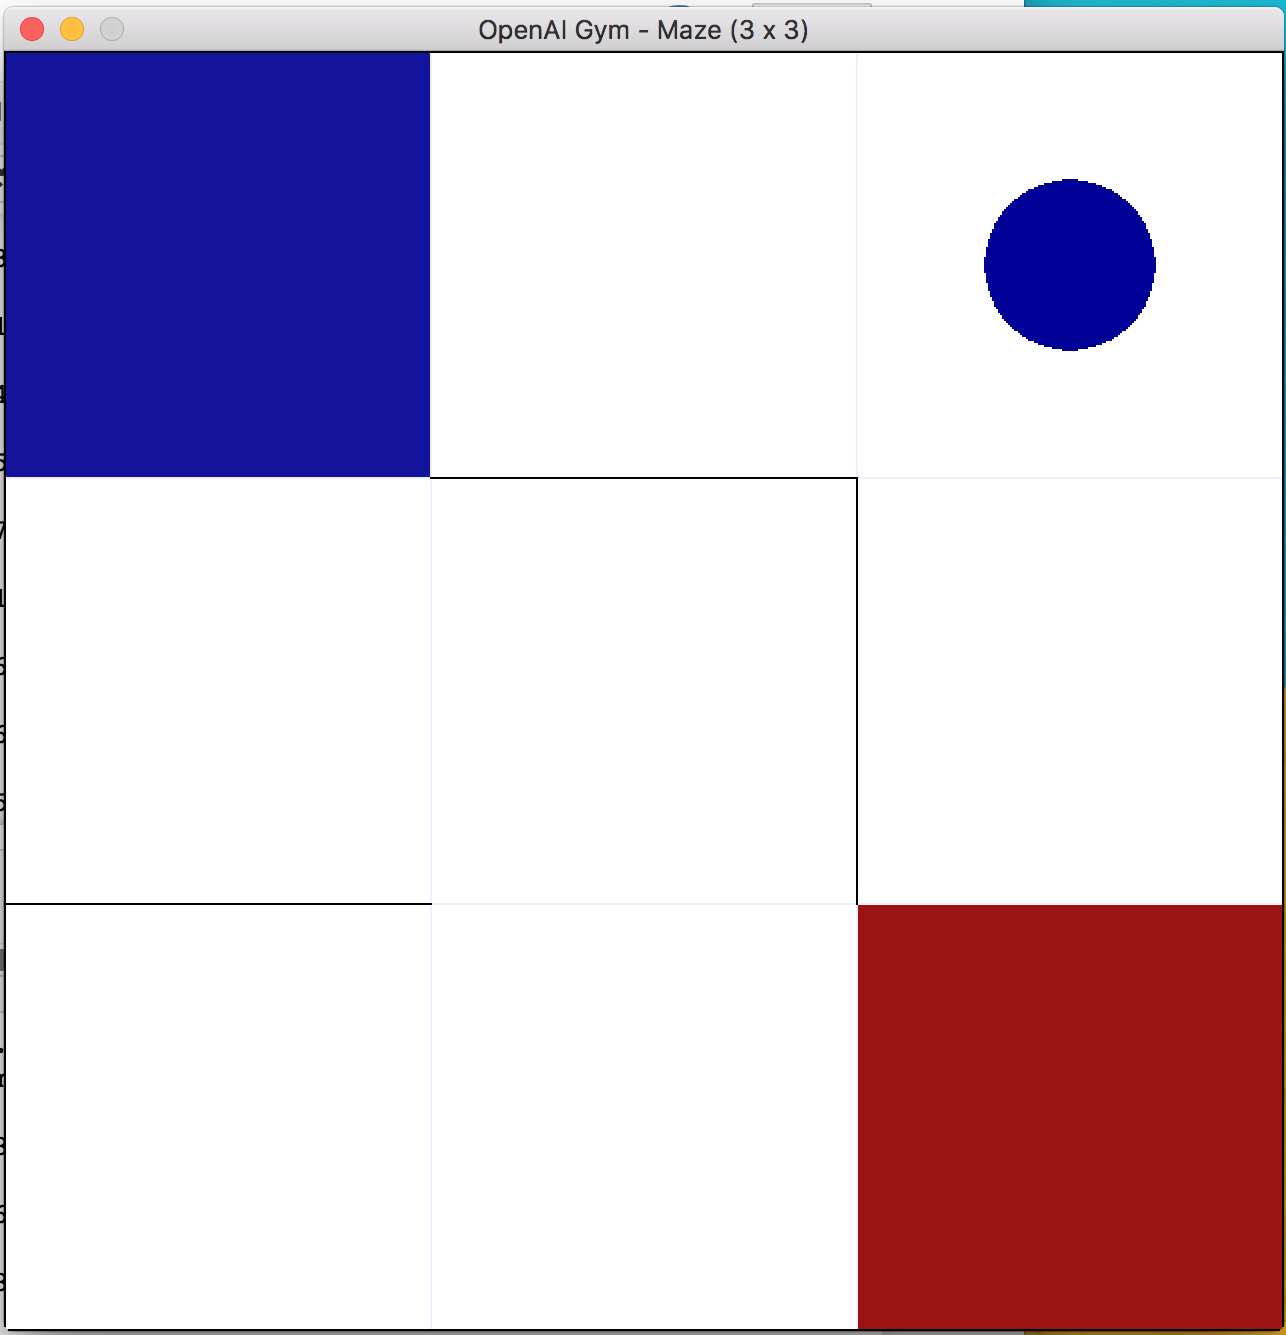

In [5]:
Image(filename='pictures/2.png',width=400, height=400)

In [6]:
env = gym.make(mazes[1])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Episode finished after 40 timesteps
Starting episode 1
Episode finished after 49 timesteps
Starting episode 2
Episode finished after 15 timesteps
Starting episode 3
Episode finished after 20 timesteps
Starting episode 4
Episode finished after 30 timesteps
Starting episode 5
Episode finished after 13 timesteps
Starting episode 6
Episode finished after 26 timesteps
Starting episode 7
Episode finished after 20 timesteps
Starting episode 8
Episode finished after 32 timesteps
Starting episode 9
Episode finished after 9 timesteps
Starting episode 10
Episode finished after 37 timesteps
Starting episode 11
Episode finished after 12 timesteps
Starting episode 12
Episode finished after 5 timesteps
Starting episode 13
Episode finished after 35 timesteps
Starting episode 14
Episode finished after 24 timesteps
Starting episode 15
Episode finished after 11 timesteps
Starting episode 16
Episode finished after 23 timesteps
Starting episode 17
Episode finished after 17 timesteps
Star

### Results for 'maze-random-5x5-v0'

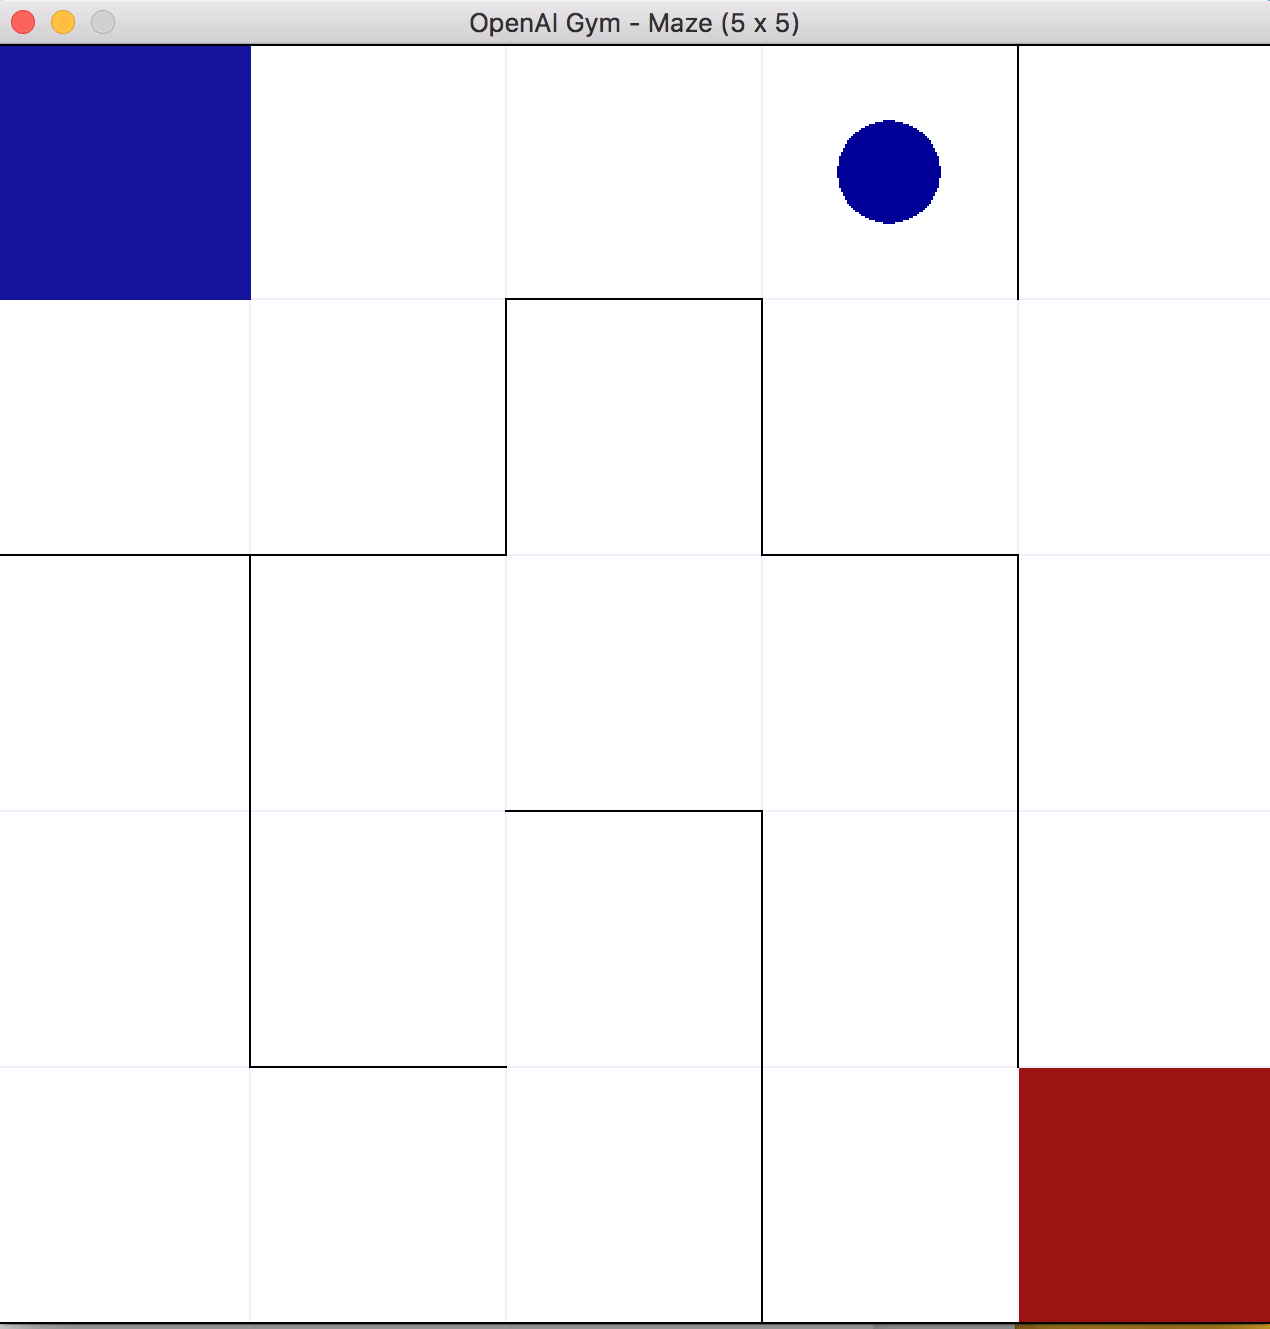

In [7]:
Image(filename='pictures/3.png',width=400, height=400)

In [8]:
env = gym.make(mazes[2])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Episode finished after 198 timesteps
Starting episode 1
Episode finished after 271 timesteps
Starting episode 2
Episode finished after 242 timesteps
Starting episode 3
Episode finished after 251 timesteps
Starting episode 4
Episode finished after 206 timesteps
Starting episode 5
Episode finished after 163 timesteps
Starting episode 6
Episode finished after 85 timesteps
Starting episode 7
Episode finished after 247 timesteps
Starting episode 8
Episode finished after 82 timesteps
Starting episode 9
Episode finished after 74 timesteps
Starting episode 10
Episode finished after 33 timesteps
Starting episode 11
Episode finished after 105 timesteps
Starting episode 12
Episode finished after 230 timesteps
Starting episode 13
Episode finished after 107 timesteps
Starting episode 14
Episode finished after 35 timesteps
Starting episode 15
Episode finished after 105 timesteps
Starting episode 16
Episode finished after 84 timesteps
Starting episode 17
Episode finished after 45 t

### Results for 'maze-sample-10x10-v0'

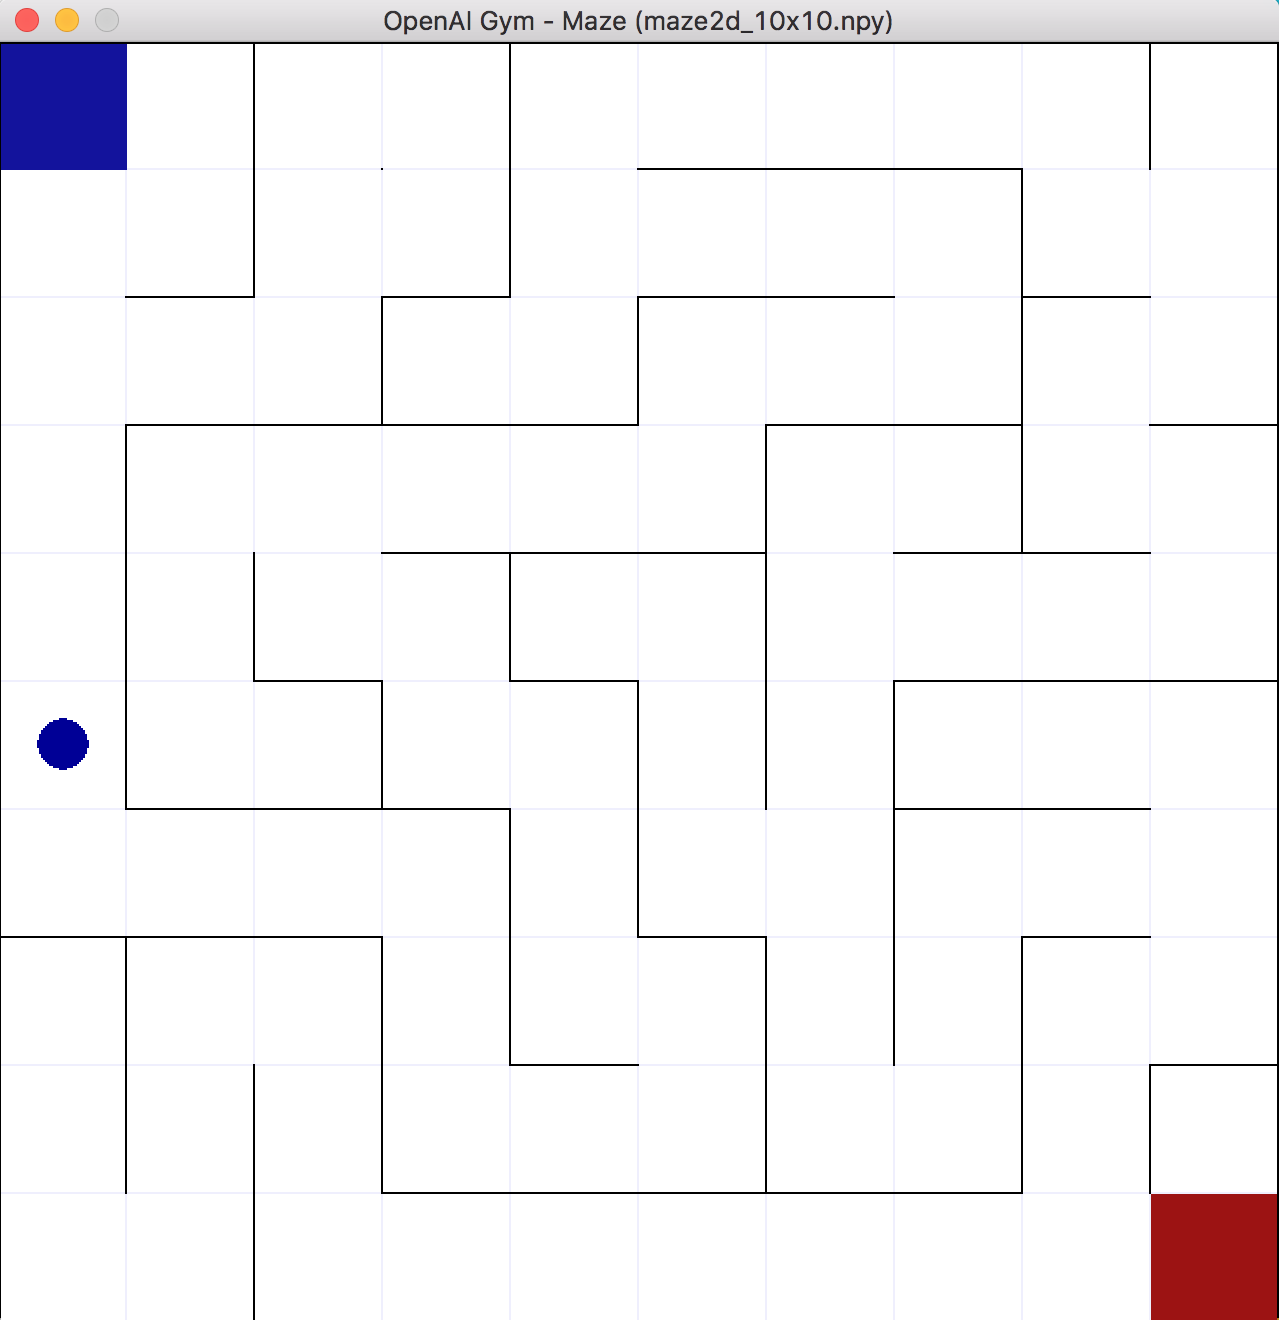

In [9]:
Image(filename='pictures/4.png',width=400, height=400)

In [10]:
env = gym.make(mazes[3])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Episode finished after 3133 timesteps
Starting episode 1
Episode finished after 4897 timesteps
Starting episode 2
Episode finished after 1114 timesteps
Starting episode 3
Episode finished after 3817 timesteps
Starting episode 4
Episode finished after 1817 timesteps
Starting episode 5
Episode finished after 1259 timesteps
Starting episode 6
Episode finished after 1539 timesteps
Starting episode 7
Episode finished after 1984 timesteps
Starting episode 8
Episode finished after 1367 timesteps
Starting episode 9
Episode finished after 1724 timesteps
Starting episode 10
Episode finished after 1259 timesteps
Starting episode 11
Episode finished after 920 timesteps
Starting episode 12
Episode finished after 637 timesteps
Starting episode 13
Episode finished after 384 timesteps
Starting episode 14
Episode finished after 493 timesteps
Starting episode 15
Episode finished after 503 timesteps
Starting episode 16
Episode finished after 409 timesteps
Starting episode 17
Episode fi

### Results for 'maze-random-10x10-v0'

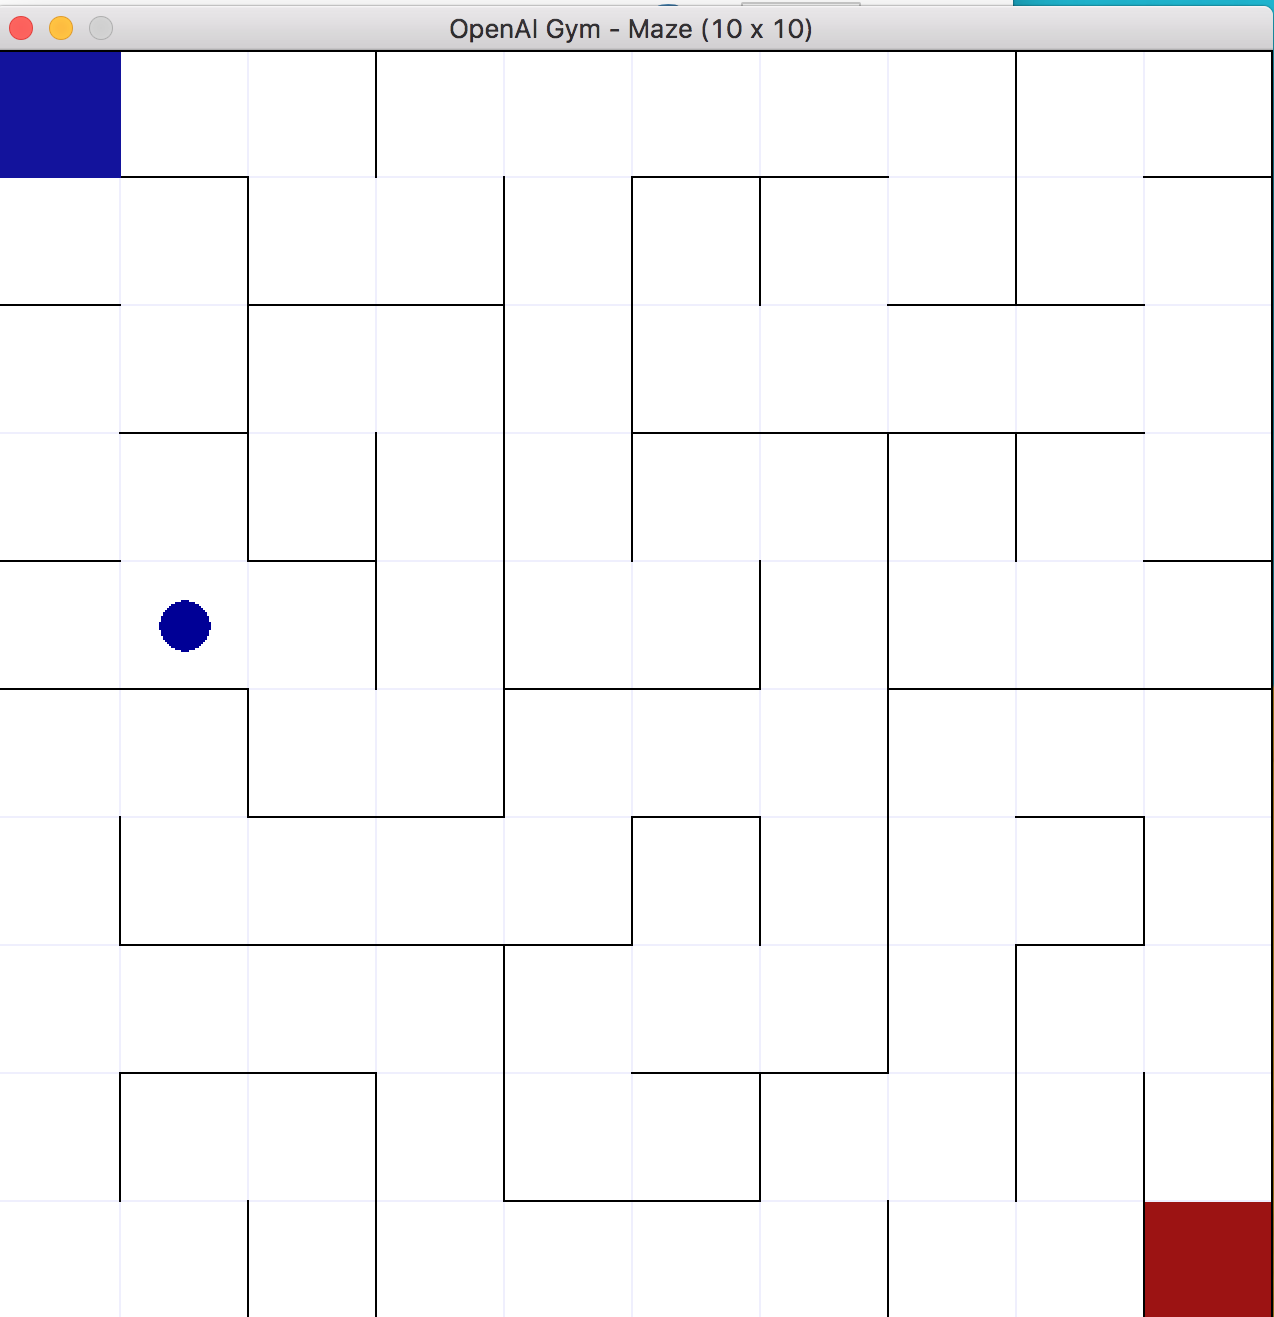

In [11]:
Image(filename='pictures/5.png',width=400, height=400)

In [12]:
env = gym.make(mazes[4])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Episode finished after 2225 timesteps
Starting episode 1
Episode finished after 4917 timesteps
Starting episode 2
Episode finished after 912 timesteps
Starting episode 3
Episode finished after 598 timesteps
Starting episode 4
Episode finished after 88 timesteps
Starting episode 5
Episode finished after 944 timesteps
Starting episode 6
Episode finished after 260 timesteps
Starting episode 7
Episode finished after 790 timesteps
Starting episode 8
Episode finished after 333 timesteps
Starting episode 9
Episode finished after 93 timesteps
Starting episode 10
Episode finished after 273 timesteps
Starting episode 11
Episode finished after 572 timesteps
Starting episode 12
Episode finished after 256 timesteps
Starting episode 13
Episode finished after 192 timesteps
Starting episode 14
Episode finished after 279 timesteps
Starting episode 15
Episode finished after 129 timesteps
Starting episode 16
Episode finished after 109 timesteps
Starting episode 17
Episode finished afte

### Results for 'maze-sample-20x20-plus-v0'

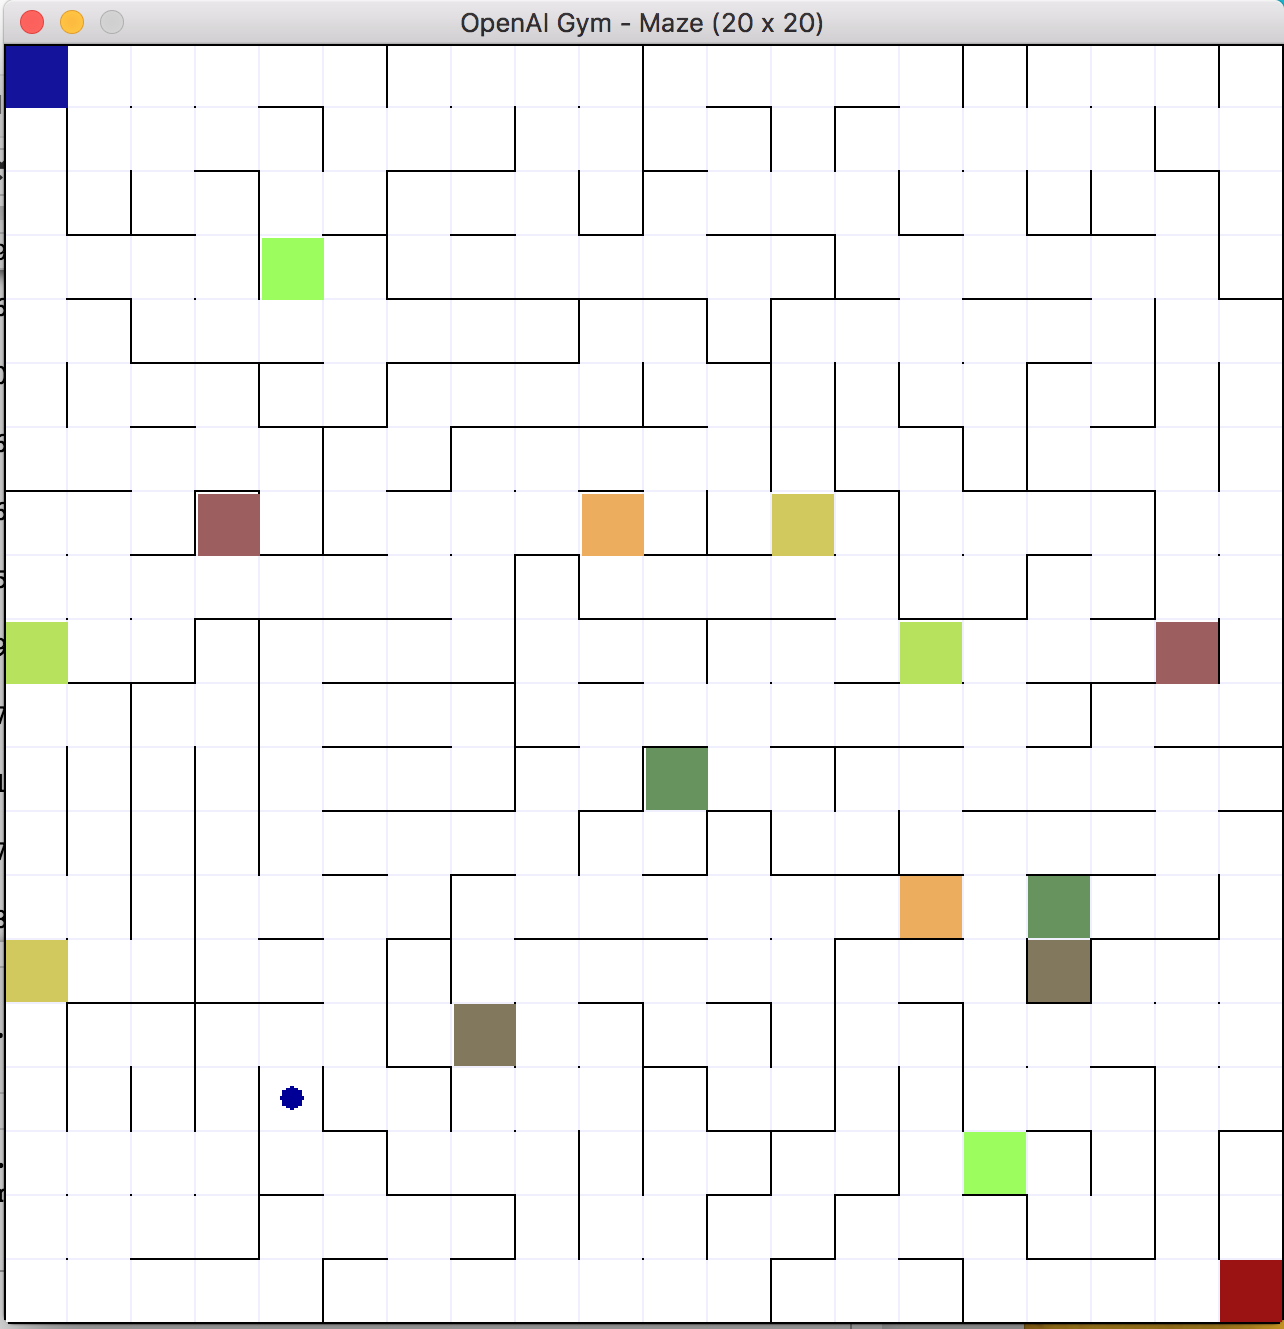

In [13]:
Image(filename='pictures/6.png',width=400, height=400)

In [14]:
env = gym.make(mazes[5])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Starting episode 1
Episode finished after 7675 timesteps
Starting episode 2
Episode finished after 2230 timesteps
Starting episode 3
Episode finished after 2208 timesteps
Starting episode 4
Episode finished after 3862 timesteps
Starting episode 5
Episode finished after 1836 timesteps
Starting episode 6
Episode finished after 1315 timesteps
Starting episode 7
Episode finished after 1510 timesteps
Starting episode 8
Episode finished after 1305 timesteps
Starting episode 9
Episode finished after 580 timesteps
Starting episode 10
Episode finished after 276 timesteps
Starting episode 11
Episode finished after 1173 timesteps
Starting episode 12
Episode finished after 1780 timesteps
Starting episode 13
Episode finished after 278 timesteps
Starting episode 14
Episode finished after 345 timesteps
Starting episode 15
Episode finished after 233 timesteps
Starting episode 16
Episode finished after 176 timesteps
Starting episode 17
Episode finished after 154 timesteps
Starting ep

### Results for 'maze-sample-30x30-plus-v0'

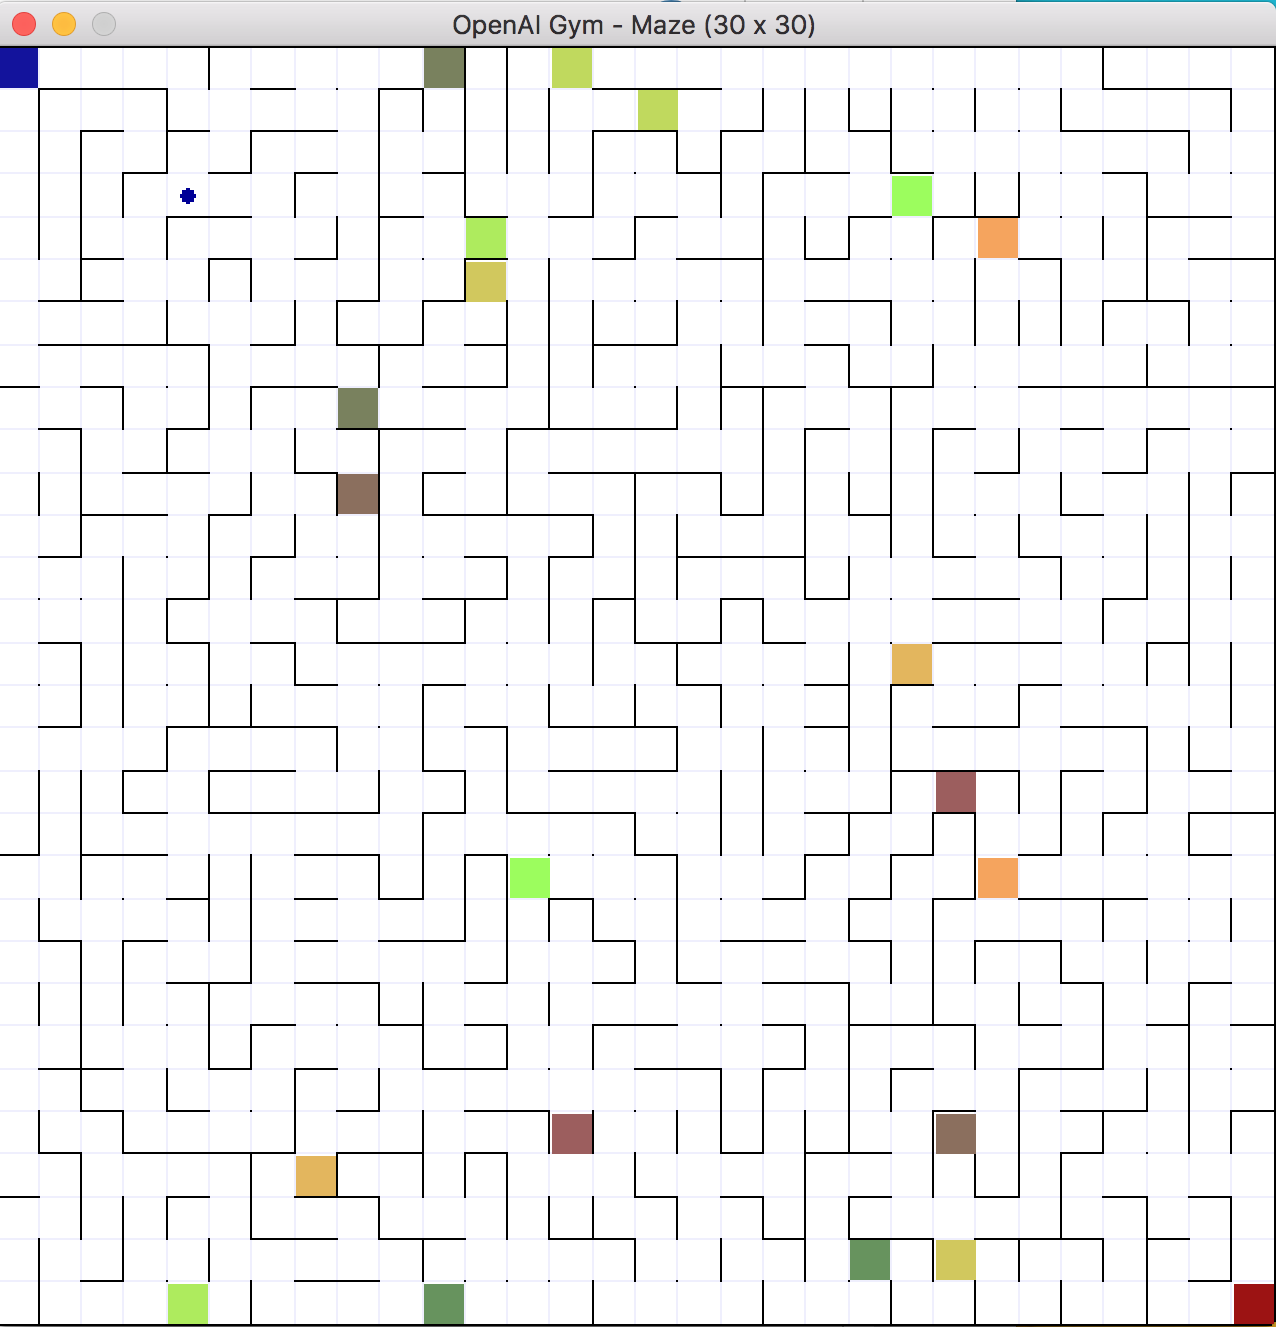

In [15]:
Image(filename='pictures/7.png',width=400, height=400)

In [16]:
env = gym.make(mazes[6])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Episode finished after 1612 timesteps
Starting episode 1
Episode finished after 8668 timesteps
Starting episode 2
Episode finished after 6630 timesteps
Starting episode 3
Episode finished after 5805 timesteps
Starting episode 4
Episode finished after 5632 timesteps
Starting episode 5
Episode finished after 1789 timesteps
Starting episode 6
Episode finished after 4806 timesteps
Starting episode 7
Episode finished after 596 timesteps
Starting episode 8
Episode finished after 339 timesteps
Starting episode 9
Episode finished after 160 timesteps
Starting episode 10
Episode finished after 1098 timesteps
Starting episode 11
Episode finished after 1670 timesteps
Starting episode 12
Episode finished after 386 timesteps
Starting episode 13
Episode finished after 618 timesteps
Starting episode 14
Episode finished after 1203 timesteps
Starting episode 15
Episode finished after 2041 timesteps
Starting episode 16
Episode finished after 413 timesteps
Starting episode 17
Episode fi

## Results

In [17]:
def plot_results(maze_episodes, plot_type):
    """
    Given a dictionary that contains data associated with each maze size, 
    returns different plots: number of steps, number of episodes till convergence 
    and execution time.
    """
    optimal_step = {}
    number_of_episodes = {}
    execution_times = {}
    
    for key, value in maze_episodes.items():
        optimal_step[key[0]] = value['steps'][-1]
        number_of_episodes[key[0]] = value['num_episodes']
        execution_times[key[0]] = value['execution_time_ms']

    
    if plot_type == 'optimal_steps':
        x = list(optimal_step.keys())
        y = list(optimal_step.values())
        sns.set()
        fig, ax = plt.subplots(figsize=(12,8))
        sns.lineplot(x, y, markers=True)
        plt.xlabel('Maze Size')
        plt.ylabel('Number of Optimal Steps')
        plt.title("Number of Optimal Steps as a Function of Maze Size",  fontsize='large')
    
    
    if plot_type == 'episodes':
        x = list(number_of_episodes.keys())
        y = list(number_of_episodes.values())
        sns.set()
        fig, ax = plt.subplots(figsize=(12,8))
        sns.lineplot(x, y, markers=True)
        plt.xlabel('Maze Size')
        plt.ylabel('Number of Episodes')
        plt.title("Number of Episodes as a Function of Maze Size",  fontsize='large')
    
    if plot_type == 'exec_time':
        x = list(execution_times.keys())
        y = list(execution_times.values())
        sns.set()
        fig, ax = plt.subplots(figsize=(12,8))
        sns.lineplot(x, y, markers=True)
        plt.xlabel('Maze Size')
        plt.ylabel('Execution Time(ms)')
        plt.title("Execution Time as a Function of Maze Size",  fontsize='large')

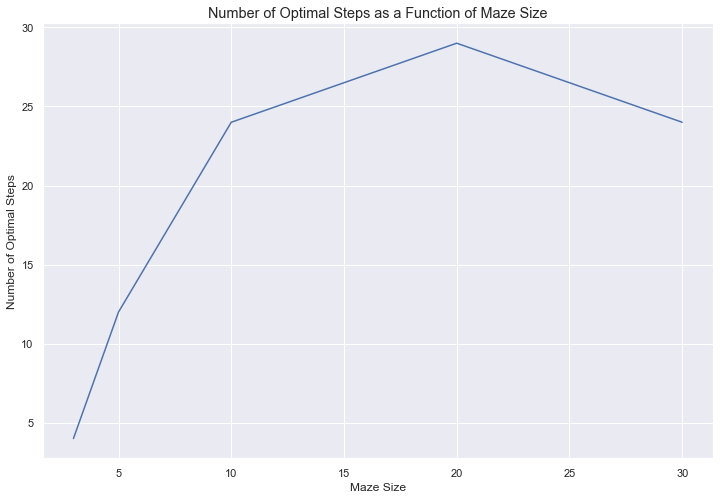

In [18]:
plot_results(maze_episodes, plot_type='optimal_steps')

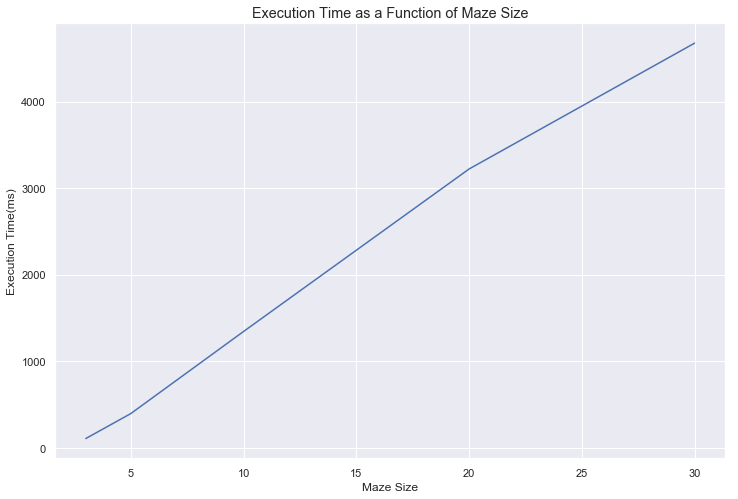

In [19]:
plot_results(maze_episodes, plot_type='exec_time')

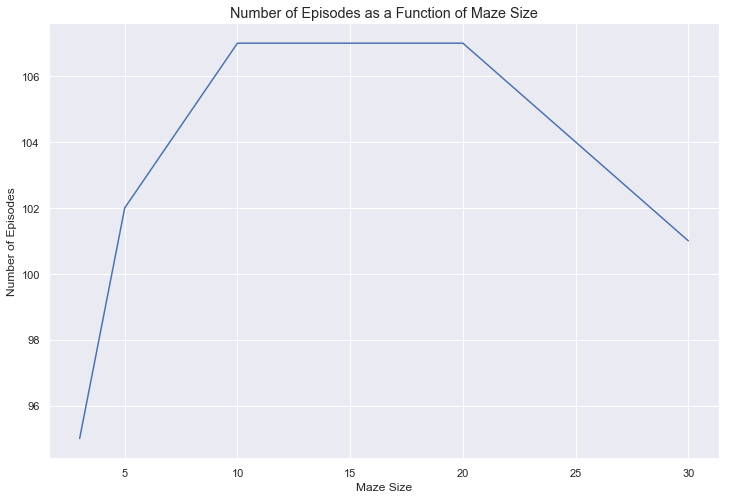

In [20]:
plot_results(maze_episodes, plot_type='episodes')

## References
* Maze environment from: https://github.com/MattChanTK/gym-maze
* Parts of `find_cheese()` function from [OpenAI's](http://gym.openai.com/docs/) documentation